In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\sahil\OneDrive\Naresh IT Class\Data Files\Loan_Prediction_AV.csv")

In [6]:
df[['ApplicantIncome', 'LoanAmount']].isnull().sum() 

ApplicantIncome    0
LoanAmount         0
dtype: int64

In [5]:
median = df['LoanAmount'].median()
df['LoanAmount'].fillna(median,inplace=True)

In [7]:
x = df.iloc[:,[6,8]].values

In [8]:
x

array([[5849.,  128.],
       [4583.,  128.],
       [3000.,   66.],
       ...,
       [8072.,  253.],
       [7583.,  187.],
       [4583.,  133.]])

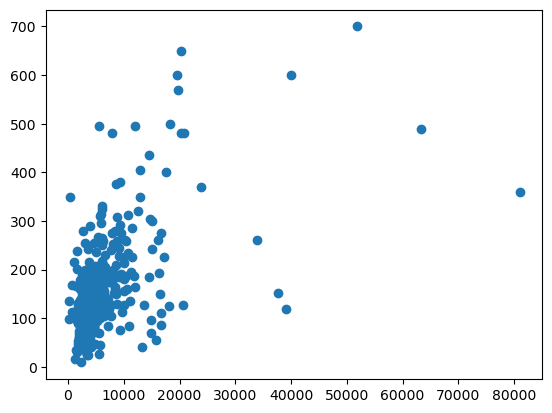

In [9]:
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])

In [10]:
k_means = KMeans(n_clusters=1, max_iter=300, random_state=1234)
k_means

KMeans(n_clusters=1, random_state=1234)

In [12]:
k_means.fit(x)

KMeans(n_clusters=1, random_state=1234)

In [13]:
k_means.inertia_

22881735550.853416

In [14]:
k_means.cluster_centers_

array([[5403.45928339,  145.752443  ]])

In [20]:
inertia_list = []
for i in range(1,20):
    k_means = KMeans(n_clusters=i, max_iter=300, random_state=1234)
    k_means.fit(x)
    inertia_list.append(k_means.inertia_)

In [21]:
inertia_list

[22881735550.853416,
 9085073953.31278,
 4135836459.3863964,
 2702655451.3149686,
 1443370226.5755405,
 958456690.9622297,
 710603719.2122297,
 534106270.73410654,
 418177075.8614714,
 329566726.13727015,
 262017611.66419345,
 202428885.78255454,
 178957907.29029116,
 144726830.0202809,
 127507289.21958321,
 104379496.07923381,
 88863222.19470046,
 78988640.17338048,
 67838203.68437475]

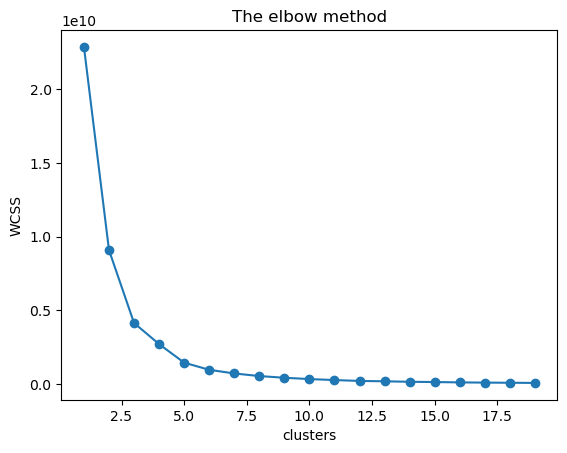

In [22]:
plt.plot(range(1,20),inertia_list)
plt.scatter(range(1,20),inertia_list)
plt.title("The elbow method")
plt.xlabel("clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
k_means = KMeans(n_clusters=5,max_iter=300,random_state=1234)
y_cluster = k_means.fit_predict(x)
y_cluster

array([4, 0, 0, 0, 4, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4,
       0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       4, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 4, 0, 0,
       4, 0, 0, 4, 0, 1, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 1, 0, 4, 4, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 4, 0, 1, 0, 1, 0, 4, 0, 4, 0, 4, 0,
       0, 3, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 3, 0, 4, 0, 0,
       0, 4, 0, 0, 4, 0, 0, 3, 0, 3, 0, 0, 0, 4, 0, 1, 4, 0, 0, 0, 4, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0,
       0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 0, 4, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0,

In [24]:
df['Cluster'] = y_cluster

In [25]:
df['Cluster'].value_counts()

Cluster
0    433
4    141
1     33
3      5
2      2
Name: count, dtype: int64

In [27]:
cluster_1_mean = df[df['Cluster'] == 0][['ApplicantIncome','LoanAmount']].mean()
cluster_2_mean = df[df['Cluster'] == 1][['ApplicantIncome','LoanAmount']].mean()
cluster_3_mean = df[df['Cluster'] == 2][['ApplicantIncome','LoanAmount']].mean()
cluster_4_mean = df[df['Cluster'] == 3][['ApplicantIncome','LoanAmount']].mean()
cluster_5_mean = df[df['Cluster'] == 4][['ApplicantIncome','LoanAmount']].mean()

In [28]:
df1 = {
    "cluster 1": cluster_1_mean,
    "cluster 2": cluster_2_mean,
    "cluster 3": cluster_3_mean,
    "cluster 4": cluster_4_mean,
    "cluster 5": cluster_5_mean,

}

In [29]:
pd.DataFrame(df1)

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
ApplicantIncome,3252.676674,16222.303030,72168.5,40494.8,7284.879433
LoanAmount,118.314088,284.181818,425.0,366.4,185.829787


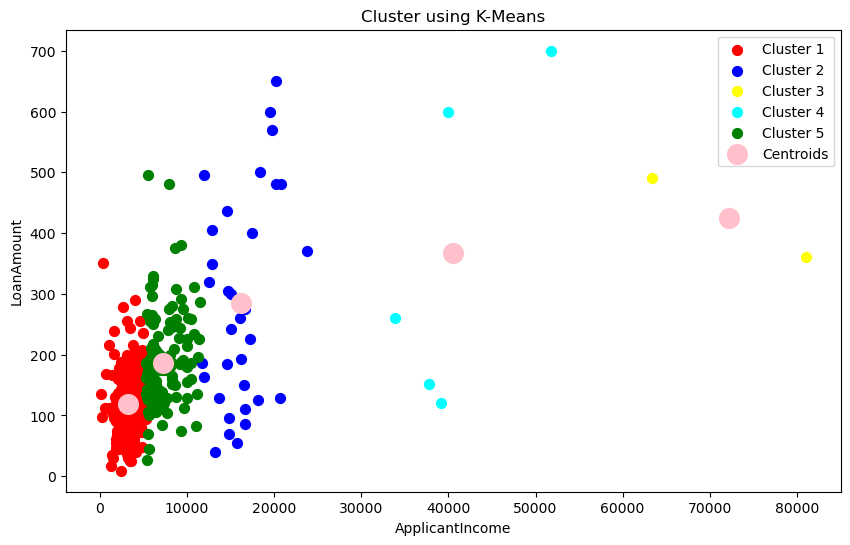

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_cluster==0,0], x[y_cluster==0,1], s=50, c='red',label='Cluster 1')
plt.scatter(x[y_cluster==1,0], x[y_cluster==1,1], s=50, c='blue',label='Cluster 2')
plt.scatter(x[y_cluster==2,0], x[y_cluster==2,1], s=50, c='yellow',label='Cluster 3')
plt.scatter(x[y_cluster==3,0], x[y_cluster==3,1], s=50, c='cyan',label='Cluster 4')
plt.scatter(x[y_cluster==4,0], x[y_cluster==4,1], s=50, c='green',label='Cluster 5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=200,c='pink',label="Centroids")
plt.title('Cluster using K-Means')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.legend()
plt.show()